In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import joblib

In [47]:
data = pd.read_csv('card_transdata.csv',)
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


[Text(0, 0, '912597'), Text(0, 0, '87403')]

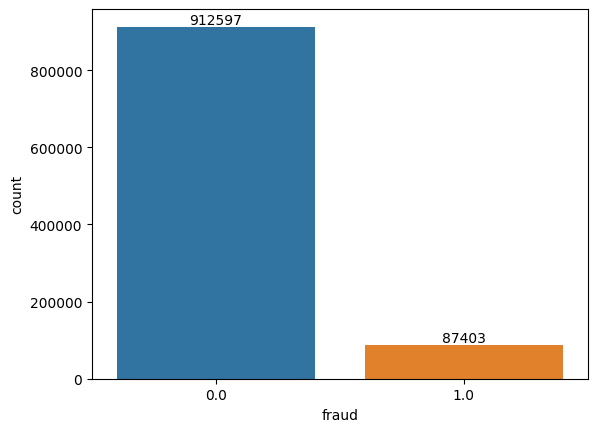

In [48]:
ax =sns.countplot(data, x='fraud')
ax.bar_label(ax.containers[0])

In [49]:
class_distribution = data['fraud'].value_counts()
print(class_distribution)

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [50]:
X = data.drop('fraud', axis=1)
y = data['fraud']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [53]:
class_distribution_resampled = y_train_resampled.value_counts()
print(class_distribution_resampled)

fraud
0.0    730040
1.0    730040
Name: count, dtype: int64


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [55]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
36502/36502 [==============================] - 67s 2ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0095 - val_accuracy: 0.9965
Epoch 2/10
36502/36502 [==============================] - 66s 2ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0071 - val_accuracy: 0.9971
Epoch 3/10
36502/36502 [==============================] - 67s 2ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0039 - val_accuracy: 0.9986
Epoch 4/10
36502/36502 [==============================] - 68s 2ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0070 - val_accuracy: 0.9973
Epoch 5/10
36502/36502 [==============================] - 68s 2ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0037 - val_accuracy: 0.9986
Epoch 6/10
36502/36502 [==============================] - 67s 2ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 7/10
36502/36502 [==============================] - 66s 2ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0

In [81]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

6250/6250 [==============================] - 9s 1ms/step - loss: 0.0040 - accuracy: 0.9990
Test Loss: 0.0040
Test Accuracy: 0.9990


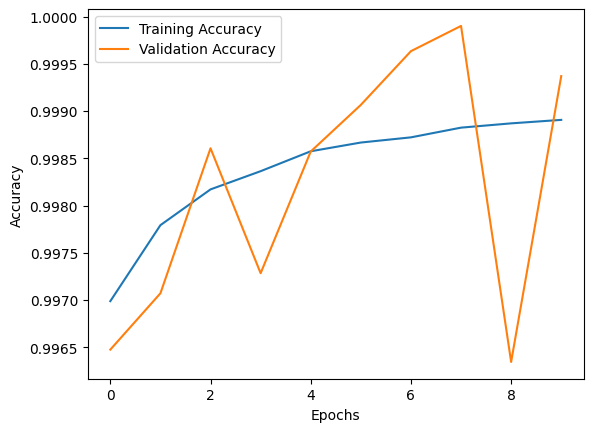

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [73]:
# Assume `input_data` is a list or array containing your input values for features.
# Convert it to a numpy array if needed.
input_data = np.array([3.803057351,67.24108053,1.872949614,1,0,0,1])
input_data = input_data.reshape(1, -1)  # Reshape to match the input shape of the model

# Standardize the input data
input_data = scaler.transform(input_data)


c:\Users\medam\anaconda3\envs\blackjack\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [74]:
prediction = model.predict(input_data)
print(prediction)
# The `prediction` variable will contain the probability of fraud. You can choose a threshold to classify it as fraud or not.
threshold = 0.5  # You can adjust this threshold as needed

if prediction >= threshold:
    print("Fraudulent Transaction")
else:
    print("Not a Fraudulent Transaction")


1/1 [==============================] - 0s 51ms/step
[[0.99963933]]
Fraudulent Transaction


In [72]:
model.save("fraud_detection_model.h5")


c:\Users\medam\anaconda3\envs\blackjack\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
model = load_model("fraud_detection_model.h5")
input_data = np.array([3.803057351,67.24108053,1.872949614,1,0,0,1])
input_data = input_data.reshape(1, -1)  # Reshape to match the input shape of the model

# Standardize the input data
input_data = scaler.transform(input_data)
prediction = model.predict(input_data)
print(prediction)
# The `prediction` variable will contain the probability of fraud. You can choose a threshold to classify it as fraud or not.
threshold = 0.5  # You can adjust this threshold as needed

if prediction >= threshold:
    print("Fraudulent Transaction")
else:
    print("Not a Fraudulent Transaction")

1/1 [==============================] - 0s 64ms/step
[[0.99963933]]
Fraudulent Transaction


c:\Users\medam\anaconda3\envs\blackjack\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
np.save('x_train.npy', X_train)